In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
df = pd.read_pickle("../rna2/test_NBatoms_ld10_16kernels_4.27A_IC_f_0/infer_run/result_4days.pkl")
df

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label
0,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.402177,0.999734,"[0.5586485266685486, 1.9873799085617065, -0.41...",-1.043423,md_run_2_1695323595,2,440
1,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,1,1.522161,0.998398,"[0.5388327240943909, 1.8327358961105347, 0.462...",-1.158537,md_run_2_1695323595,2,209
2,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,2,1.594429,0.999807,"[0.5603600144386292, 0.9495664834976196, 0.364...",-1.069568,md_run_2_1695323595,2,182
3,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,3,1.334793,0.999812,"[1.422613263130188, 2.8166468143463135, 0.9570...",-1.128694,md_run_2_1695323595,2,12
4,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,4,1.564717,0.999686,"[0.39517462253570557, 1.282995343208313, -0.16...",-1.197970,md_run_2_1695323595,2,64
...,...,...,...,...,...,...,...,...,...,...
767995,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,995,1.385269,0.999837,"[-0.15419892966747284, 0.4119950234889984, 0.5...",-1.213179,md_run_7_1695660115,7,215
767996,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,996,1.340121,0.999826,"[-0.9240164756774902, 1.6742666959762573, 0.19...",-1.074279,md_run_7_1695660115,7,163
767997,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,997,1.306534,0.999818,"[0.38695815205574036, -1.3655040264129639, 0.3...",-1.148347,md_run_7_1695660115,7,215
767998,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,998,1.222190,0.998906,"[1.924309253692627, 0.7662814259529114, -0.424...",-1.086965,md_run_7_1695660115,7,51


In [3]:
df['sys_label']

0         md_run_0_1692329418
1         md_run_0_1692329418
2         md_run_0_1692329418
3         md_run_0_1692329418
4         md_run_0_1692329418
                 ...         
655995    md_run_5_1692670552
655996    md_run_5_1692670552
655997    md_run_5_1692670552
655998    md_run_5_1692670552
655999    md_run_5_1692670552
Name: sys_label, Length: 656000, dtype: object

In [4]:
timeline = {}
pairs = []
for gpu_id in df.gpu_id.unique(): 
    timeline[f"gpu_{gpu_id}"] = []
    sub_df = df[df.gpu_id == gpu_id]
    for sys_label in tqdm(sub_df.sys_label.unique()): 
        current_time = int(sys_label.split('_')[-1]) - 1695323595     # mapping the wall clock starting time of simulation to the beginning of the main job
        timeline[f"gpu_{gpu_id}"].append(current_time)
        pdb = sub_df[sub_df.sys_label == sys_label]['pdb'].to_list()[0]
        if pdb.startswith('md_run'):      
            target = [current_time, int(gpu_id)]     # relative starting wall clock time, GPU id
            source = [int(pdb[:-4].split('_')[3])  - 1695323595, int(pdb[:-4].split('_')[2])]  # relative starting wall clock time, and GPU id of the sim from which the IC is picked 
            pairs.append([source, target])     # making pairs of the source and target

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 118.85it/s]


In [14]:
a="md_run_6_1681218718_000641.pdb"

a[:-4].split('_')[2]
a[:-4]

'md_run_6_1681218718_000641'

In [12]:
b="/project/zerze/ayushg/argonne/ddmd/rna2/test/md_run/md_run_3_1695417604/checkpnt.chk"
b.split('/')[-2]

'md_run_3_1695417604'

In [25]:
"/project/zerze/ayushg/argonne/ddmd/rna2/test/md_run/md_run_3_1695414989/md_run_4_1695344334_000244.pdb".split('.')[0].split('/')[-1].split('_00')[0]

'md_run_4_1695344334'

In [8]:
%run ~/.mpl_set.py

Text(0.5, 0, 'MD steps')

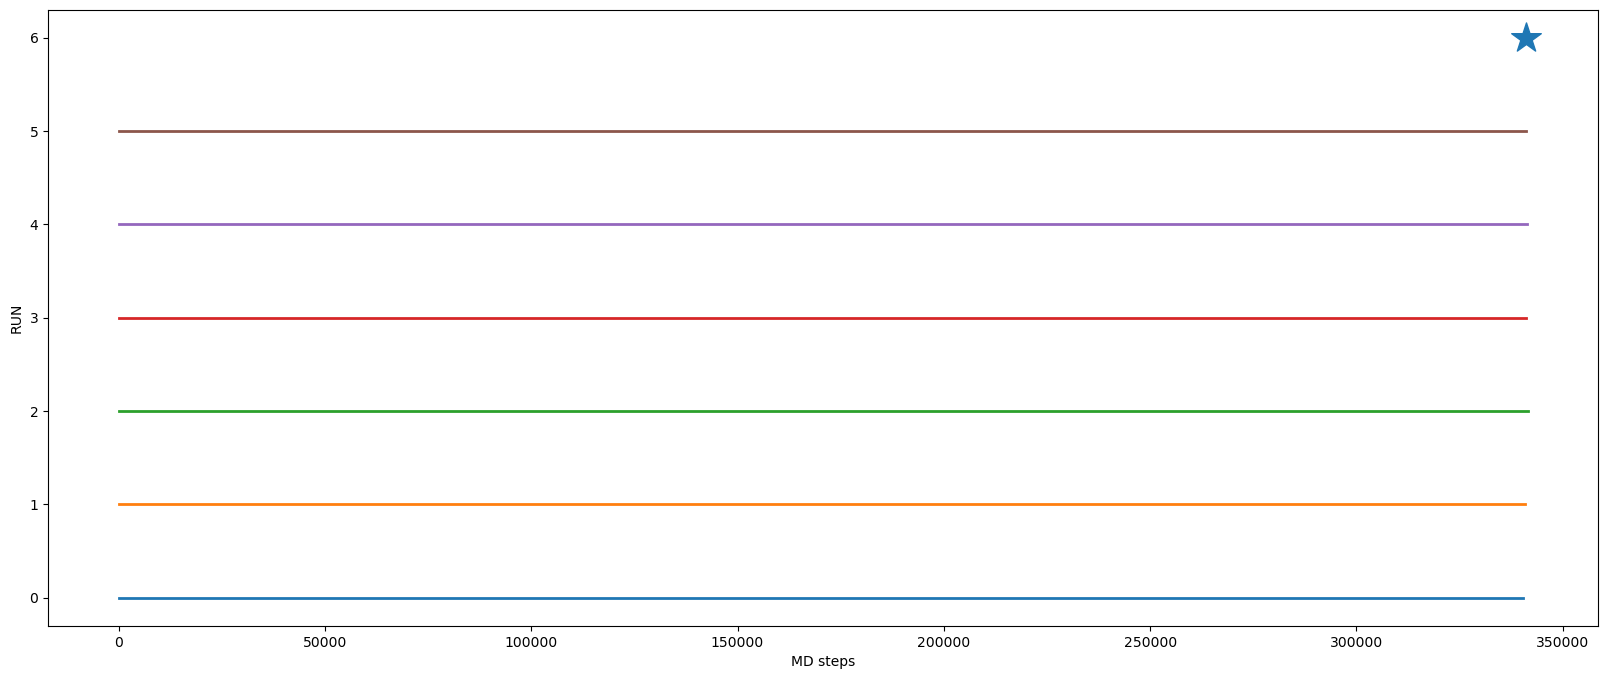

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))

for gpu_id in timeline: 
    ax.plot(timeline[gpu_id], np.ones_like(timeline[gpu_id]) * int(gpu_id[-1]), linewidth=2)
for pair in pairs: 
    pair = np.array(pair)
    dist = pair[1] - pair[0]
    ax.arrow(*pair[0], *dist, linewidth=.1)
    
ax.scatter([1692670552  - 1692329418], [6], marker='*', s=500)
ax.set_ylabel("RUN")
ax.set_xlabel("MD steps")

In [8]:
df.iloc[(np.argmin(df.rmsd))]

pdb              /project/zerze/ayushg/argonne/ddmd/rna3/test/m...
dcd              /project/zerze/ayushg/argonne/ddmd/rna3/test_R...
frame                                                          915
rmsd                                                       3.32762
Q                                                         0.591535
embeddings       [-0.6929620504379272, 0.2937558889389038, 0.22...
lof_score                                                -2.146565
sys_label                                      md_run_1_1692610127
gpu_id                                                           1
cluster_label                                                  417
Name: 198915, dtype: object

In [10]:
def traj_stack(dtrajs): 
    y_len = max(len(i) for i in dtrajs)
    dtraj_stacks = np.ones([len(dtrajs), y_len]) * -1
    for i, dtraj in enumerate(dtrajs):
        dtraj_stacks[i, :len(dtraj)] = dtraj
    return dtraj_stacks[dtraj_stacks != -1]

In [11]:
dtrajs['total'] = traj_stack(dtrajs.values())

NameError: name 'dtrajs' is not defined

In [12]:
for i in dtrajs: 
    print(len(dtrajs[i]))

NameError: name 'dtrajs' is not defined

In [17]:
%%time
def sampling(traj): 
    sampled = []
    n_sampled = []
    for i in tqdm(traj): 
        if i not in sampled: 
            sampled.append(i)
        n_sampled.append(len(sampled))
    return None # n_sampled

sampling(dtrajs['total'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3231000/3231000 [00:15<00:00, 210116.50it/s]

CPU times: user 15.4 s, sys: 113 ms, total: 15.5 s
Wall time: 15.6 s


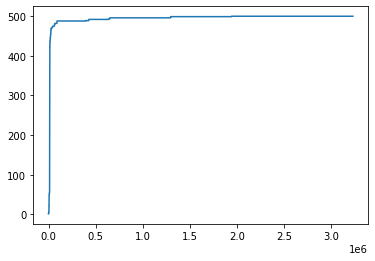

In [13]:
plt.plot(sampling(dtrajs['total']))

In [20]:
df.pdb.unique()

array(['/homes/heng.ma/Research/ddmd/ddmd/data/pdbs/bba/1FME-unfolded.pdb'],
      dtype=object)